# Random Walk Generation

$$ \frac{S_{t+dt} - S_{t}}{S_{t}} = \mu dt + \sigma \sqrt{dt} \xi_{t}$$

In [3]:
import numpy as np
import pandas as pd

def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years * steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    # to prices?
    prices = s_0 * (1+rets).cumprod()
    return prices

In [13]:
p = gbm(10, n_scenarios=3)

In [14]:
p.shape

(120, 3)

In [15]:
p.head()

,0,1,2
0,104.860933,97.539269,98.928494
1,110.437883,103.475660,99.231176
2,105.754138,104.210913,95.011076
3,107.780878,99.751592,97.801651
4,104.111156,97.796134,94.284582


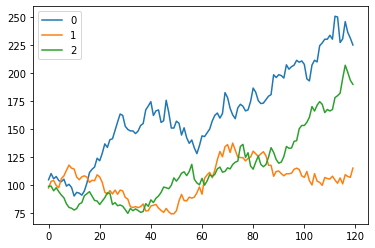

In [16]:
p.plot()

In [18]:
p = gbm(n_years=10, n_scenarios=1000)#.plot(figsize=(12,6), legend=False)

In [24]:
def gbm0(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years * steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    # to prices?
    prices = s_0 * (1+rets).cumprod()
    return prices

def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years * steps_per_year)
    rets_plus_1 = np.random.normal(loc=(1+mu*dt), scale=sigma*np.sqrt(dt), size=(n_steps, n_scenarios))
    # to prices?
    prices = s_0 * pd.DataFrame(rets_plus_1).cumprod()
    return prices

In [22]:
%timeit gbm0(n_years=5, n_scenarios=1000)

4.34 ms ± 124 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [23]:
%timeit gbm1(n_years=5, n_scenarios=1000)

5.72 ms ± 696 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


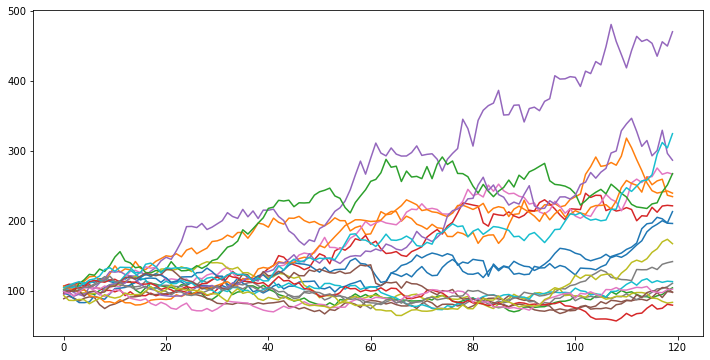

In [27]:
gbm(n_years=10, n_scenarios=20).plot(legend=False, figsize=(12,6))

In [28]:
def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years * steps_per_year)
    rets_plus_1 = np.random.normal(loc=(1+mu*dt), scale=sigma*np.sqrt(dt), size=(n_steps, n_scenarios))
    rets_plus_1[0] = 1
    # to prices?
    prices = s_0 * pd.DataFrame(rets_plus_1).cumprod()
    return prices

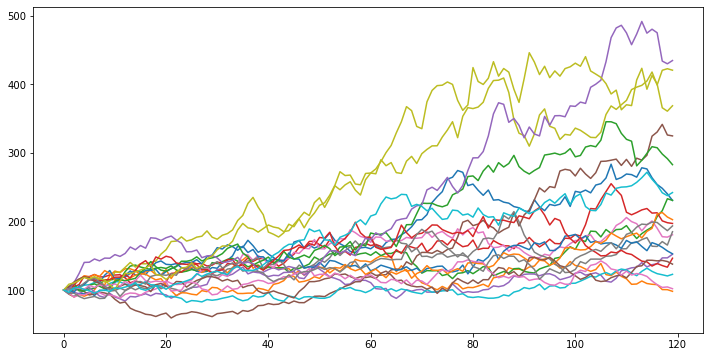

In [29]:
gbm(n_years=10, n_scenarios=20).plot(legend=False, figsize=(12,6))

In [30]:
gbm(n_scenarios=10).head()

,0,1,2,3,4,5,6,7,8,9
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,107.434987,95.979018,96.260094,93.638396,95.483251,103.624035,89.980192,107.608300,101.237043,102.507539
2,106.275723,85.992632,99.145259,95.721412,93.400360,106.314967,89.660232,112.200287,106.992160,105.706845
3,109.150689,88.160092,98.819544,99.313997,92.328201,100.268532,91.535288,112.261283,108.923481,114.656241
4,108.915028,87.034883,91.639480,98.147800,96.214166,99.434791,88.539261,113.410024,109.440748,113.706987
